#Модель Солоу

$\Delta K = sY_t − (n + g + δ)K_t$ - Модель Солоу.

Собственно модель Солоу пытается объяснить динамику изменения капитала в промежуток времени $\Delta t$, в зависимости от уровня инвестиций и существующего капитала. Интерпретировать ее можно достаточно просто. Капитал изменяется на величину инвестиций $sY_t$ с вычетом затрат на поддержание работоспособности существующего капитала $(n + g + δ)K_t$. Рассмотрим подробнее величину инвестиций $sY_t$. Здесь за $Y_t$ обозначают суммарное производство. Заметим, что эта виличина зависит от $K$, $L$, $E$, т.е $Y_t=F(K, L, E)$.  У этой функции есть важное свойство - уменьшающийся предельный продукт, т.е со временем рост должен замедлятся. Если эту величину мы умножим на $s$ - долю общего числа сбережений американских домохозяйств, то получим величину инвестиций. Да, число инвестиций $!=$ числу сбережений, но в контексте данной модели этим можно пренебречь. Теперь рассмотри затраты на поддержание работоспособности существующего капитала. Очевидно что данная величина зависит от $K_t$ (капитал в момент времени $t$) и от некоторых коэффициентов: 

$n$ - константа равная темпу роста населения

$\delta$ - коэффициент выбытия или износа капитала

$s$ - доля общего числа сбережений американских домохозяйств

$g$ - константа равная темпу роста технологического прогресса

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib inline

**Как мы получили E?**

Вообще достаточно сложно численно выразить параметр E(efficiency of labor). И для его вычисления мы решили обратиться к производственной функции Кобба-Дугласа, которая удивительным образом выражает зависимость Y(Real GDP(ВВП)) от K(Real Fixed Capital), L(Labor Force), E(Efficiency of labor). Сама функция имеет вид $Y = F(L, K) = E*L^{1 - a} * K ^a$, где $a$ - константа и часто равняется 1/3 (данная константа является спорной частью модели, т.к ни Кобб, ни Дуглас не предоставили теоретических обоснований постоянства коэффициента $a$ 
(https://ru.wikipedia.org/wiki/%D0%A4%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D1%8F_%D0%9A%D0%BE%D0%B1%D0%B1%D0%B0_%E2%80%94_%D0%94%D1%83%D0%B3%D0%BB%D0%B0%D1%81%D0%B0)  . Отсюда нетрудно получить $E = Y / (L^{1 - a} * K ^a)$. Стоит заметить, что функция Кобба-Дугласа удовлетворяет всем аксиомам производственной функции, подробнее об этом написано в замечательной книжке D. HOOVER APPLIED INTERMEDIATE MACROECONOMICS.

In [ ]:
  def findE(Y, K, a, L):
      Y = Y * (10 ** 9)
      K = (K * (10 ** 9)) ** (1 - (1 - a))
      X = (Y / K) ** (1 / ( 1 - a) )
      return X / L

# Аналитическое решение

Модель Солоу можно представить в виде Задачи Коши:

\begin{equation}
k'(t) = sk(t)^α − (n + g + δ)k(t),\;k(0) = k_0
\end{equation}

Введем новую переменную:
\begin{equation}
z(t) = k(t)^{1−α} \\
z'(t) = (1 − α)k(t)^{-α}k'(t) \\
k'(t) = \frac{z'(t)k(t)^{α}}{1-α}
\end{equation}

Подставим в наше уравнение, у нас получилось линейное неоднородное:
\begin{equation}
z'(t) + (n + g + δ)(1 − α)z(t) = s(1 − α)
\end{equation}

Решаем линейное однородное:
\begin{equation}
z'(t) = -(n + g + δ)(1 − α)z(t) \\
\ln{z(t)} = -(n + g + δ)(1 − α)t + C \\
z(t) = Ce^{-(n + g + δ)(1 − α)t}
\end{equation}

Варьируем постоянную:
\begin{equation}
C'(t) = s(1 − α)e^{(n + g + δ)(1 − α)t} \\
C(t) = \frac{s(1 − α)e^{(n + g + δ)(1 − α)t}}{(n + g + δ)(1 − α)} + A = \frac{se^{(n + g + δ)(1 − α)t}}{n + g + δ} + A\\
z(t) = \frac{s}{n + g + δ} + Ae^{-(n + g + δ)(1 − α)t}
\end{equation}

Решаем Задачу Коши:
\begin{equation}
z(0) = k_0 ^ {1 - α} \\
A = k_0 ^ {1 - α} - \frac{s}{n + g + δ} \\
\end{equation}

В итоге общее решение выглядит следующим образом:
\begin{equation}
z(t) =  \left (\frac{s}{n + g + δ} \right)(1 - e^{-(n + g + δ)(1 − α)t}) + k_0 ^ {1 - α}e^{-(n + g + δ)(1 − α)t} \\ 
k(t) = \left [\left (\frac{s}{n + g + δ} \right)(1 - e^{-(n + g + δ)(1 − α)t}) + k_0 ^ {1 - α}e^{-(n + g + δ)(1 − α)t} \right ] ^ {\frac{1}{1- α}}
\end{equation}



---




Давайте возьмем данные США за 2008, т.е посчитаем $k_0$ по данным 2008. 

$K$ = 46148.9845621239 миллиардов

$Y$ = 15604.687 миллиардов

$L$ = 154128 тысяч





In [ ]:
K = 46148.9845621239
Y = 15604.687
L = 154128.333333333 * (1000)
alpha = 1/3
E = findE(Y, K, alpha, L) 
k0 = K * (10 ** 9) / L / E
n = 1 / 100
delta = 4.2 / 100
s = 16.7 / 100
g = 2.8 / 100
def k(t):
    consts = n + g + delta
    exp = math.e ** (-consts*(1-alpha) * t)
    first = (s / consts) * ( 1 - exp)
    second = (k0 ** (1 - alpha)) * math.e ** (-(n+g+delta)*(1-alpha)*t)
    return  (first + second) ** (1 / (1-alpha))

In [ ]:
k(0)
x = np.linspace(start=0, stop=100, num=1000)
y = [k(t) for t in x]

Воспользовавшись аналитическим решением построим график функции $k(t)$

#График 1.1

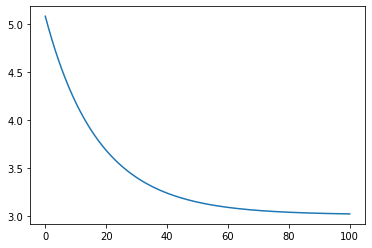

In [ ]:
plt.plot(x, y)

Заметим, что данная функция удовлетворяет модели Солоу, т.е capital per effective labor со временем уменьшается. Что удовлетворяет аксиомам, описанным в книжке Хувера.

# График $(k_t = \frac{K}{L \cdot E})$ по данным из датасета

In [ ]:

usa_data = pd.read_csv('https://raw.githubusercontent.com/mishenkoil/solow-swan-model/main/usa_stats.csv')
usa_data.head()

,Quarterly Data,Quarter,BLS Labor Productivity Index (2009=100),Labor Force (thousands),Real GDP (billions 2012 constant dollars),Real Fixed Capital (billions 2009 constant dollars)
0,NaN,1948:1,22.2,60230,2086.0,4604.0
1,NaN,1948:2,22.7,60535,2120.5,4603.5
2,Annual data,1948:3,22.6,60934,2132.6,4603.5
3,starts in column A,1948:4,22.7,60839,2135.0,4603.5
4,NaN,1949:1,22.6,60967,2105.6,4543.8


In [ ]:
usa_data['E'] = findE(usa_data['Real GDP (billions 2012 constant dollars)'], usa_data['Real Fixed Capital (billions 2009 constant dollars)'], 1/3, usa_data['Labor Force (thousands)'] * 1000) 
usa_data['k_t'] = usa_data['Real Fixed Capital (billions 2009 constant dollars)'] * (10 ** 9) / (usa_data['E'] * usa_data['Labor Force (thousands)'] * 1000)
usa_data.drop(['Quarterly Data',
               'BLS Labor Productivity Index (2009=100)', 
               'Real GDP (billions 2012 constant dollars)',
               'Real Fixed Capital (billions 2009 constant dollars)',
               'E',
               'Labor Force (thousands)'], axis='columns', inplace=True)
usa_data.head()

,Quarter,k_t
0,1948:1,3.278925
1,1948:2,3.198710
2,1948:3,3.171525
3,1948:4,3.166179
4,1949:1,3.170042


#График 2.1

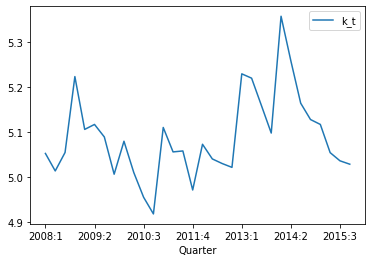

In [ ]:
usa_data.set_index("Quarter", inplace=True)
usa_data_2008 = usa_data.iloc[240:]
usa_data_2008.plot()
plt.show()

Как мы видим аналитическое решение 1.1 мало имеет общего с графиком 2.1, построенном на основе dataset. Это объясняется тем, что модель Солоу не учитывает многие факторы, такие как политическая обстановка, взаимодействие с другими странами. Более того, она сильно упрощает многие параметры. Так же аналитическое решение рассчитано на короткий промежуток времени.

#График 2.2

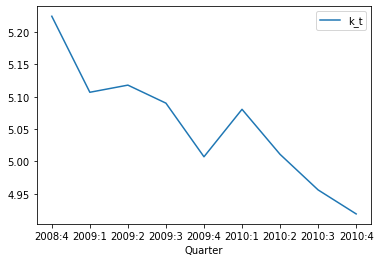

In [ ]:
shorted_data = usa_data.iloc[243:252]
shorted_data.plot()

Однако если взять промежуток с 4 квартала 2008 по 4 квартал 2010 года, то можно заметить корреляцию данных полученных аналитическим способом и с использованием данных из dataset. К сожалению, этих данных не достаточно, чтобы доказать правдоподобность модели.

# Вывод:
Мы представили Модель Солоу в виде задачи Коши и решили ее (за точку отсчета был взят 2008г.), а затем провизуализировали данные, полученные из датасета. Если сравнить графики 1.1 и 2.2 на коротком временном промежутке, может показаться, что Модель Солоу вполне хорошо описывает реальные данные, но если взять более длинный промежуток, становится ясно, что это не так. Это объясняется тем, что модель Солоу не учитывает многие факторы, такие как политическая обстановка, взаимодействие с другими странами. Более того, она сильно упрощает многие параметры.